In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [5]:
df = pd.read_csv('data/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
X = df.drop(columns=['expenses'],axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
y=df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6133.2186
- Mean Absolute Error: 4124.7082
- R2 Score: 0.7394
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5782.2130
- Mean Absolute Error: 4067.8024
- R2 Score: 0.7846


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.2476
- Mean Absolute Error: 4208.0337
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5797.2951
- Mean Absolute Error: 4182.3918
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.3089
- Mean Absolute Error: 4212.3760
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5798.5673
- Mean Absolute Error: 4187.2631
- R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4770.4644
- Mean Absolute Error: 2857.6957


In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Gradient Boosting Regressor,0.878850
7,CatBoosting Regressor,0.866221
5,Random Forest Regressor,0.859355
8,AdaBoost Regressor,0.843911
0,Linear Regression,0.784642
1,Lasso,0.783518
2,Ridge,0.783422
3,K-Neighbors Regressor,0.768453
4,Decision Tree,0.727411


In [15]:
grad_model = GradientBoostingRegressor()
grad_model = grad_model.fit(X_train, y_train)
y_pred = grad_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.90


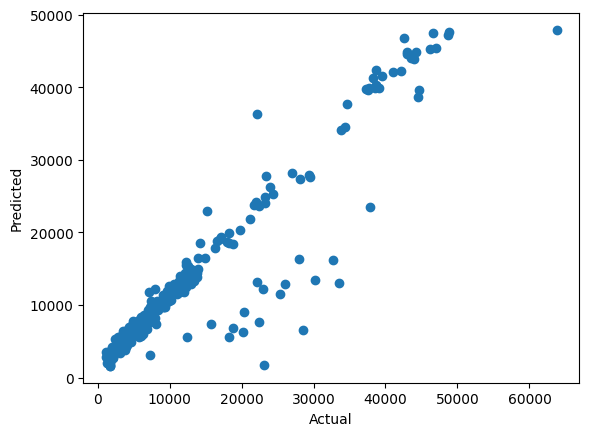

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

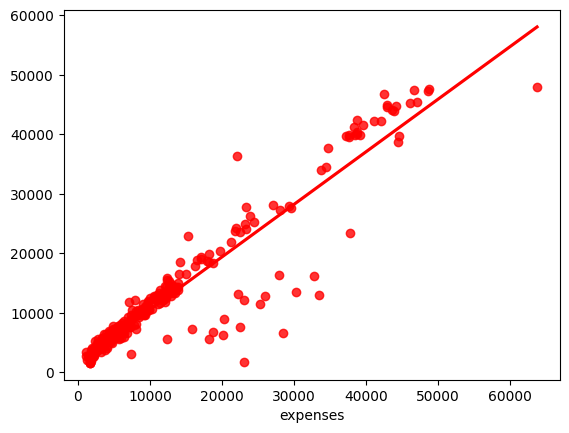

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,11421.671410,-2326.601410
887,5272.18,5808.630373,-536.450373
890,29330.98,27906.918316,1424.061684
1293,9301.89,9681.110446,-379.220446
259,33750.29,34047.020067,-296.730067
...,...,...,...
109,47055.53,45389.647025,1665.882975
575,12222.90,12538.666120,-315.766120
535,6067.13,6948.643263,-881.513263
543,63770.43,47891.158875,15879.271125


In [19]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [2, 3, 4, 5, 6, 7, 8]
}

In [20]:
hpt_model = GradientBoostingRegressor()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_search = GridSearchCV(hpt_model, param_grid, cv=10, n_jobs=-1, verbose=1)

In [23]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=1)

In [24]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [25]:
final_model = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], 
                                        max_depth=grid_search.best_params_['max_depth'],
                                        learning_rate=grid_search.best_params_['learning_rate'])

In [26]:
final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05)

In [27]:
print(final_model.score(X_test, y_test))

0.8811272007394277


In [28]:
y_pred = final_model.predict(X_test)

In [29]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.11


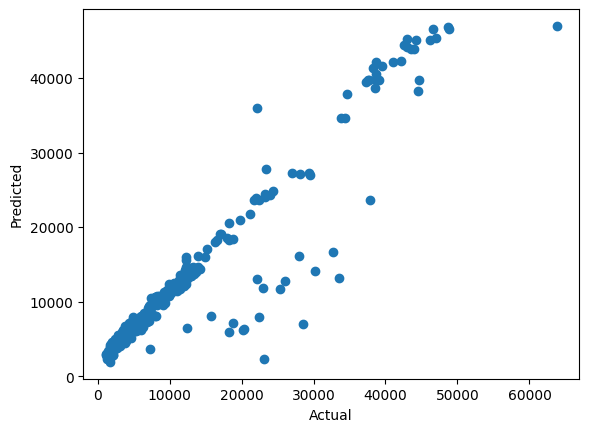

In [30]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

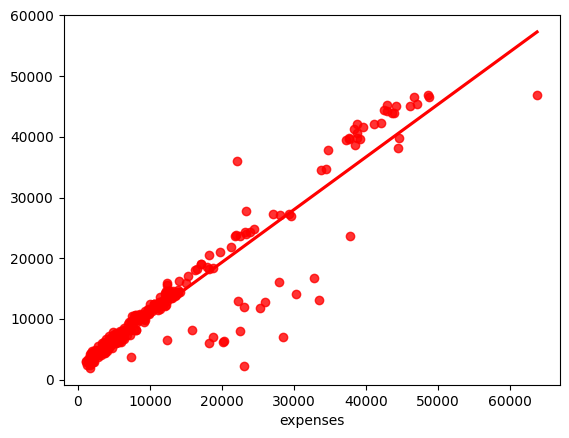

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,10496.126192,-1401.056192
887,5272.18,6106.333241,-834.153241
890,29330.98,27249.913444,2081.066556
1293,9301.89,9876.907445,-575.017445
259,33750.29,34569.869308,-819.579308
...,...,...,...
109,47055.53,45352.561740,1702.968260
575,12222.90,12339.028895,-116.128895
535,6067.13,7229.705688,-1162.575688
543,63770.43,46972.421618,16798.008382
